In [1]:
import matplotlib.pyplot as plt
import torch

from blocks import BiasBlock, CosBlock, SinBlock, Log2Block, LnBlock, Log10Block, LinearBlock, SigmoidBlock, \
    Polynomial2Block
from model import ModelFactory, MultiLayerModelFactory

# Better printing

## Simple model

In [2]:
x = torch.arange(1, 10, 0.1, dtype=torch.float32).unsqueeze(-1)
y = torch.sin(x) + torch.log2(x)
model = ModelFactory(x, y, max_size=2).from_class_list([CosBlock, SinBlock, Log2Block, LnBlock, Log10Block])
pred = model.forward(x)

In [3]:
print(model)

y = ln(x) * 0.3902 + log10(x) * 0.1767


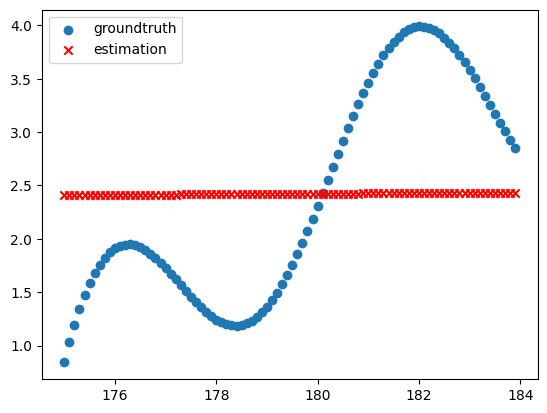

In [4]:
plt.scatter(x, y, label="groundtruth")
plt.scatter(x, pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

## Multi-layer model

In [5]:
torch.autograd.set_detect_anomaly(True)

x = torch.arange(1, 20, 0.1, dtype=torch.float32).unsqueeze(-1)
y = torch.sin(0.4 + torch.cos(x) + 1.2 * torch.sin(x)) + torch.cos(0.3 * torch.sin(x) + 1.8 * torch.cos(x))
model = MultiLayerModelFactory(x, y, max_size=3, layers=3, epochs=10000).from_class_list(
    [CosBlock, SinBlock], block=SinBlock)
pred = model.forward(x)

In [6]:
print(model)

y = sin((cos((cos((cos(x) * -0.3164 + sin(x) * 0.9239)) * 1.5914 + sin((cos(x) * 1.6976 + sin(x) * 0.4032)) * 0.4009)) * 0.7832 + sin((cos((cos(x) * 3.5565 + sin(x) * 0.5481)) * 0.0690 + sin((cos(x) * 0.9789 + sin(x) * 0.7098)) * 0.8124)) * 0.9921)) * 2.4956


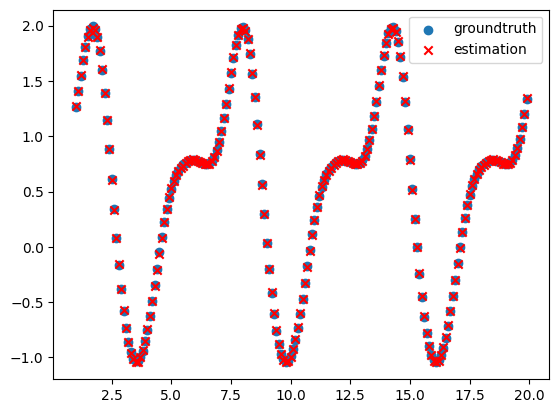

In [7]:
plt.scatter(x, y, label="groundtruth")
plt.scatter(x, pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

## 3D model

In [8]:
x1 = torch.arange(1, 20, 0.1, dtype=torch.float32).unsqueeze(-1)
x2 = torch.exp(torch.arange(1, 2.9, 0.01, dtype=torch.float32)).unsqueeze(-1)
x3 = torch.log(torch.arange(1, 57.9, 0.3, dtype=torch.float32).unsqueeze(-1))
x = torch.hstack([x1, x2, x3])
y = torch.sin(x1) + torch.cos(x1 * x2) + torch.log(0.4 + x2 * x3)

model = MultiLayerModelFactory(x, y, max_size=2, layers=2).from_class_list(
    [CosBlock, SinBlock, LinearBlock, SigmoidBlock])
pred = model.forward(x)

In [9]:
print(model)

y = (sin((cos(x) * [[0.0451], [-0.0710], [-0.3054]] + sigmoid(x) * [[3.2784], [6.4630], [-7.6955]])) * 9.0999 + sigmoid((cos(x) * [[0.4613], [-0.1317], [0.5938]] + sin(x) * [[1.8654], [0.0148], [-1.1106]])) * 6.7550) * 0.4090


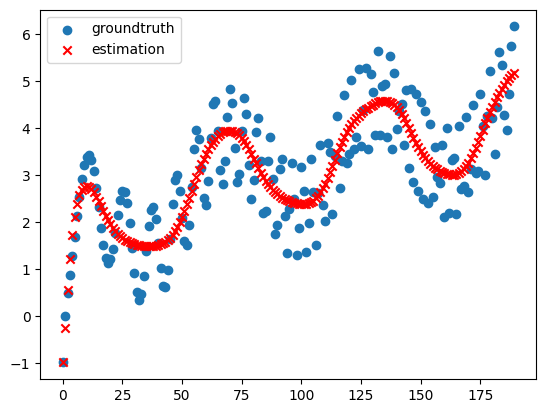

In [10]:
plt.scatter(list(range(len(y))), y, label="groundtruth")
plt.scatter(list(range(len(y))), pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()

### Variables interaction

In [11]:
x1 = torch.arange(0, 4, 0.02, dtype=torch.float)
x2 = torch.arange(0, 0.1, 0.0005, dtype=torch.float)
x3 = torch.arange(0, 2, 0.01, dtype=torch.float)

x = torch.vstack([x1, x2, x3]).t()
y = (x1 * x2 - x1 * x3 + x2 * x3 + 5.0).unsqueeze(-1)

model = ModelFactory(x, y, max_size=3).from_class_list([LinearBlock, Polynomial2Block, BiasBlock])
pred = model.forward(x)

In [12]:
print(model)

y = x * [[0.3621], [0.5722], [0.6741]] + poly(x, 2) * [[-1.2616], [-1.1725], [-0.9680]] + [4.4647]


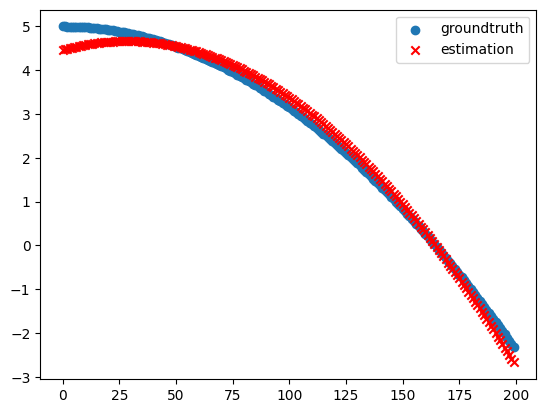

In [13]:
plt.scatter(list(range(len(y))), y, label="groundtruth")
plt.scatter(list(range(len(y))), pred.detach().numpy(), marker='x', c='red', label="estimation")
plt.legend()
plt.show()